# Постановка задачи
На основании зашифрованных параметров необходимо предсказать время тестирования автомобиля на соответствие стандартам качества (целевая переменная y).
Будем решать задачу регрессии. Оцениваемая метрика - коэффициент детерминации R^2

## Разведочный анализ данных

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [67]:
train = pd.read_csv('D://Sber_ML_DS/final_project/train.csv/train.csv')
test = pd.read_csv('D://Sber_ML_DS/final_project/test.csv/test.csv')

In [68]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [69]:
test_id = test['ID']
test.drop(columns = 'ID', inplace = True)

In [70]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
1,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
2,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
4,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


В данных 8 параметров, имеющих тип object. В дальнейшем необходимо их закодировать при помощи one-hot векторов

In [73]:
train.shape

(4209, 378)

Определим, есть ли пропущенные значения. Просуммируем отдельно по признакам, потом найдем сумму признаков.

In [74]:
train.isnull().sum().sum() 

0

In [75]:
test.isnull().sum().sum() 

0

Пропущенных значений нет

In [76]:
cat_col = train.select_dtypes(include=['object']).columns
cols = list(cat_col) + ['y', 'ID']# выделяем категориальные признаки, также y и ID

In [77]:
cols_int = list(train.drop(columns = cols).columns)
len(cols_int)
cols_1 = cols_int[:int(len(cols_int)/2)]
cols_2 = cols_int[int(len(cols_int)/2):]

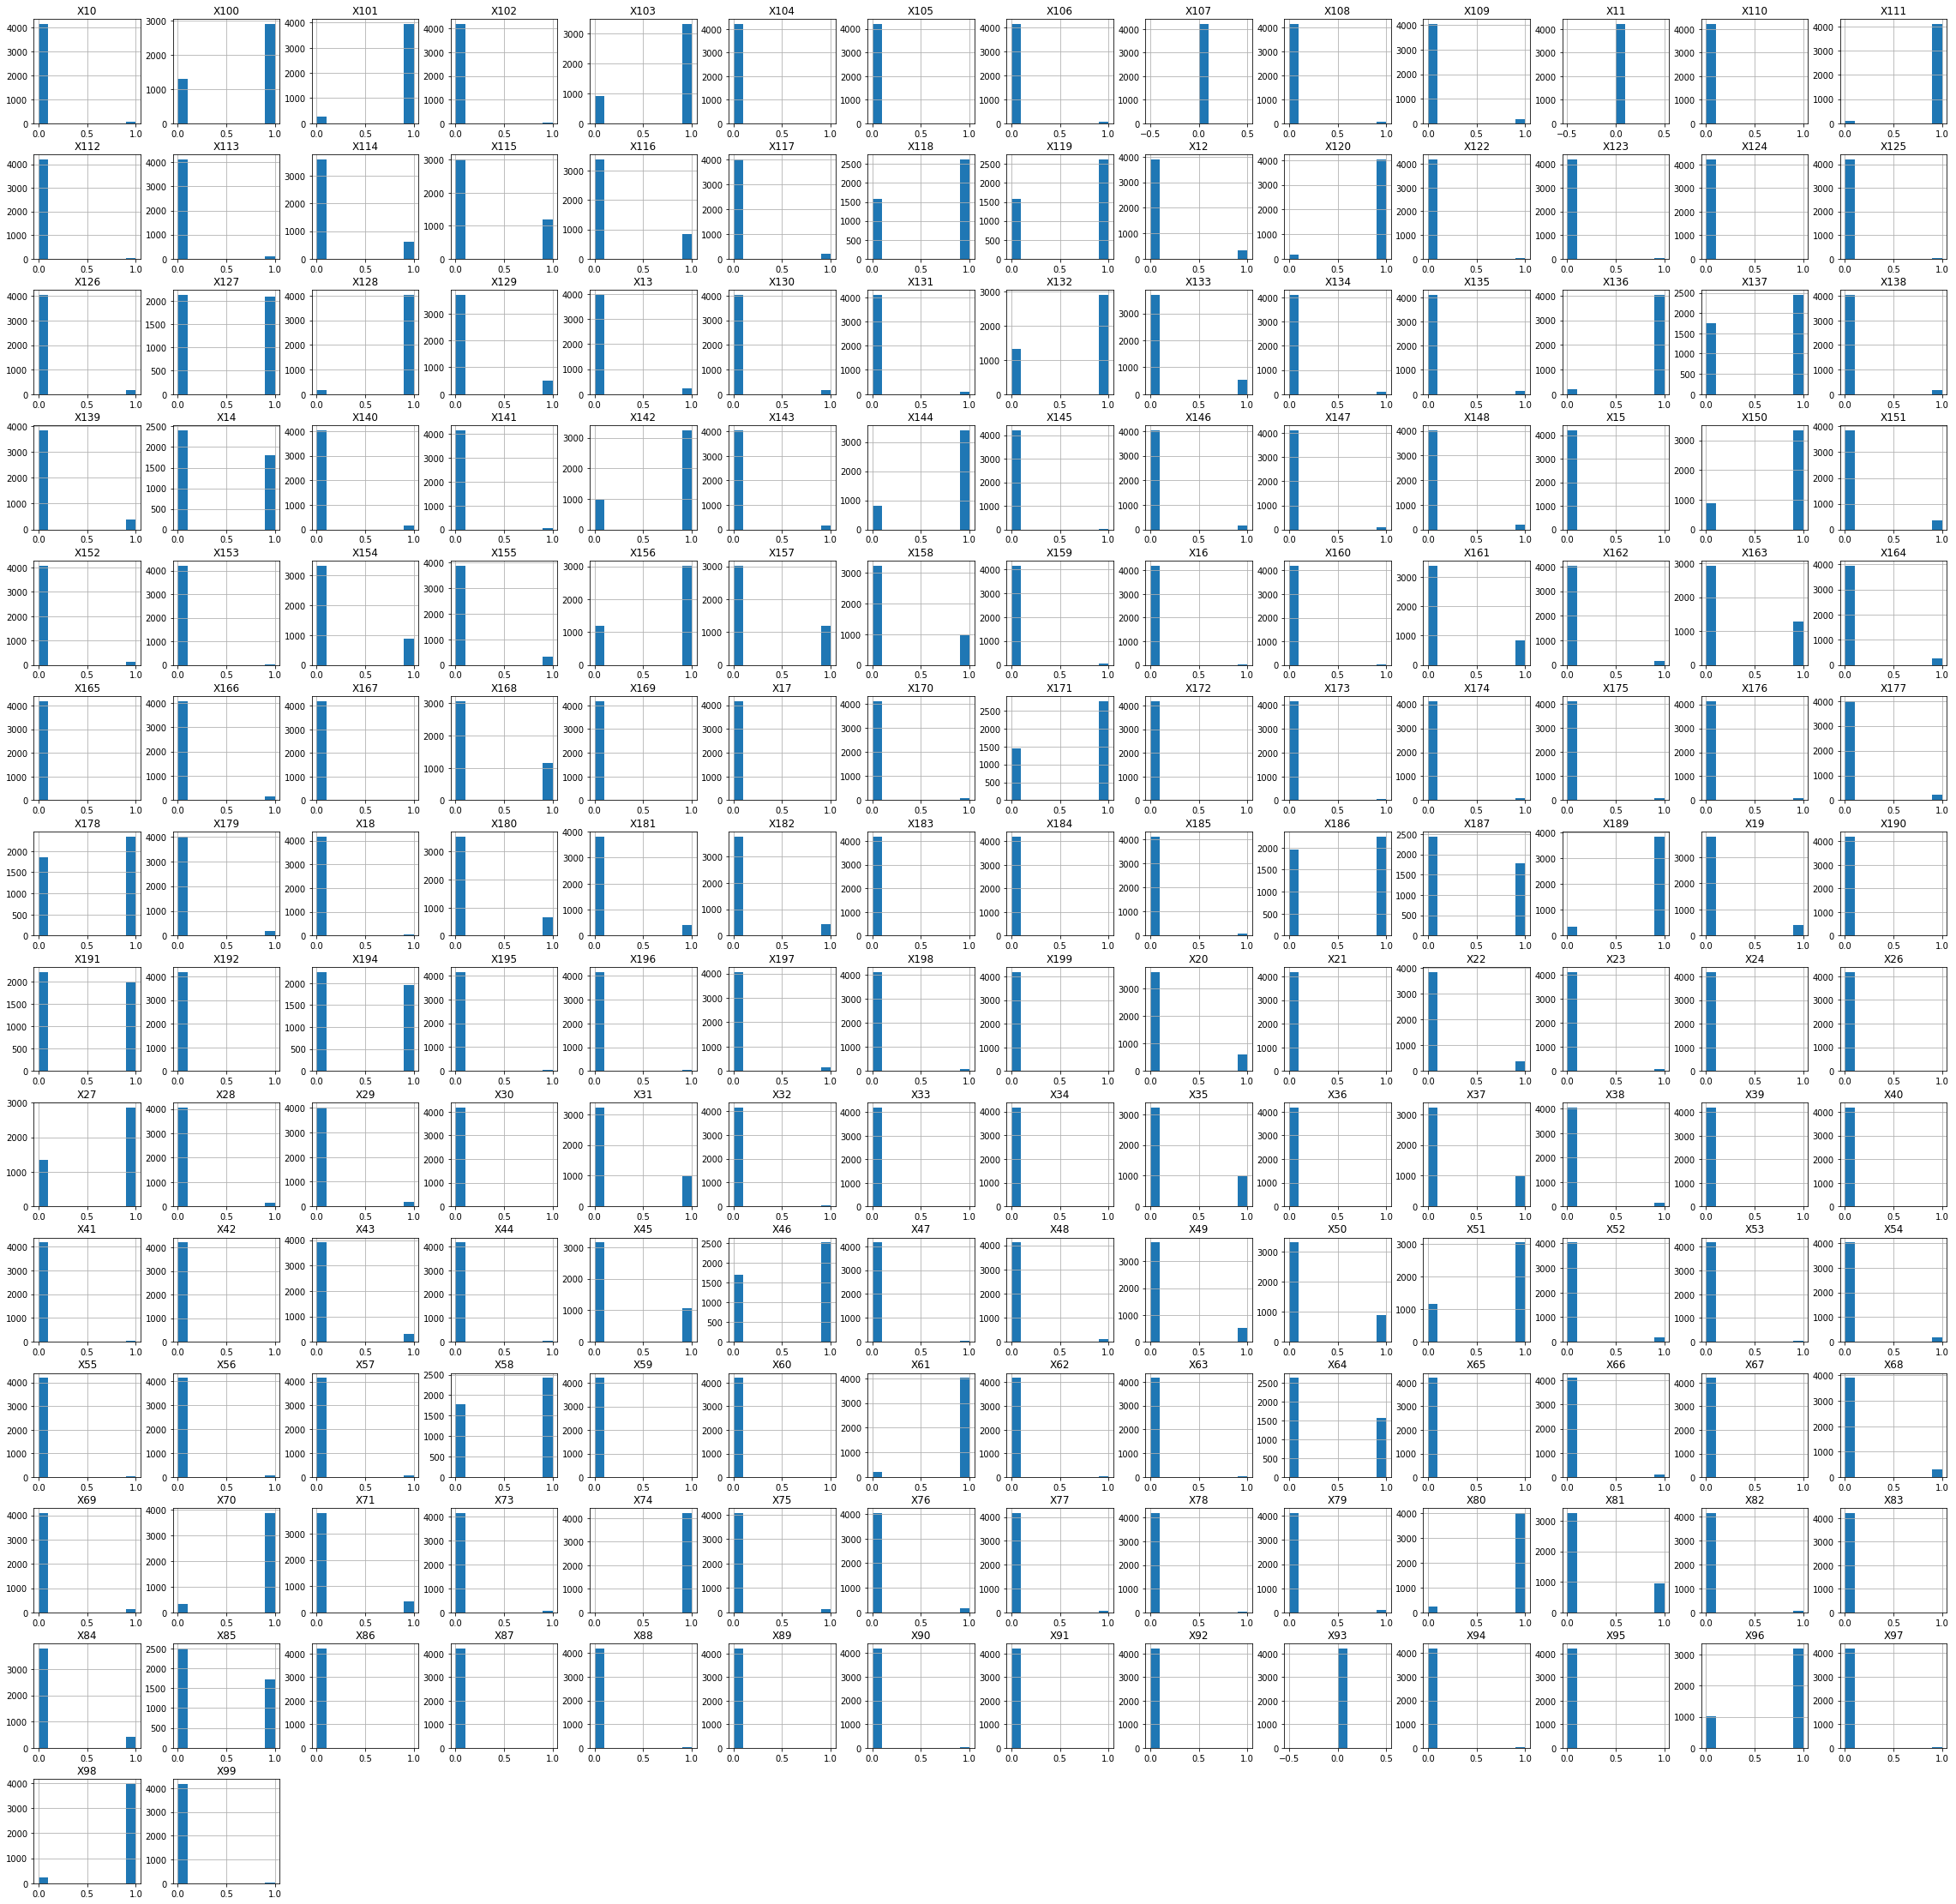

In [75]:
_ = train[cols_1].hist(figsize=(40, 40))# гистограммы для первой половины признаков

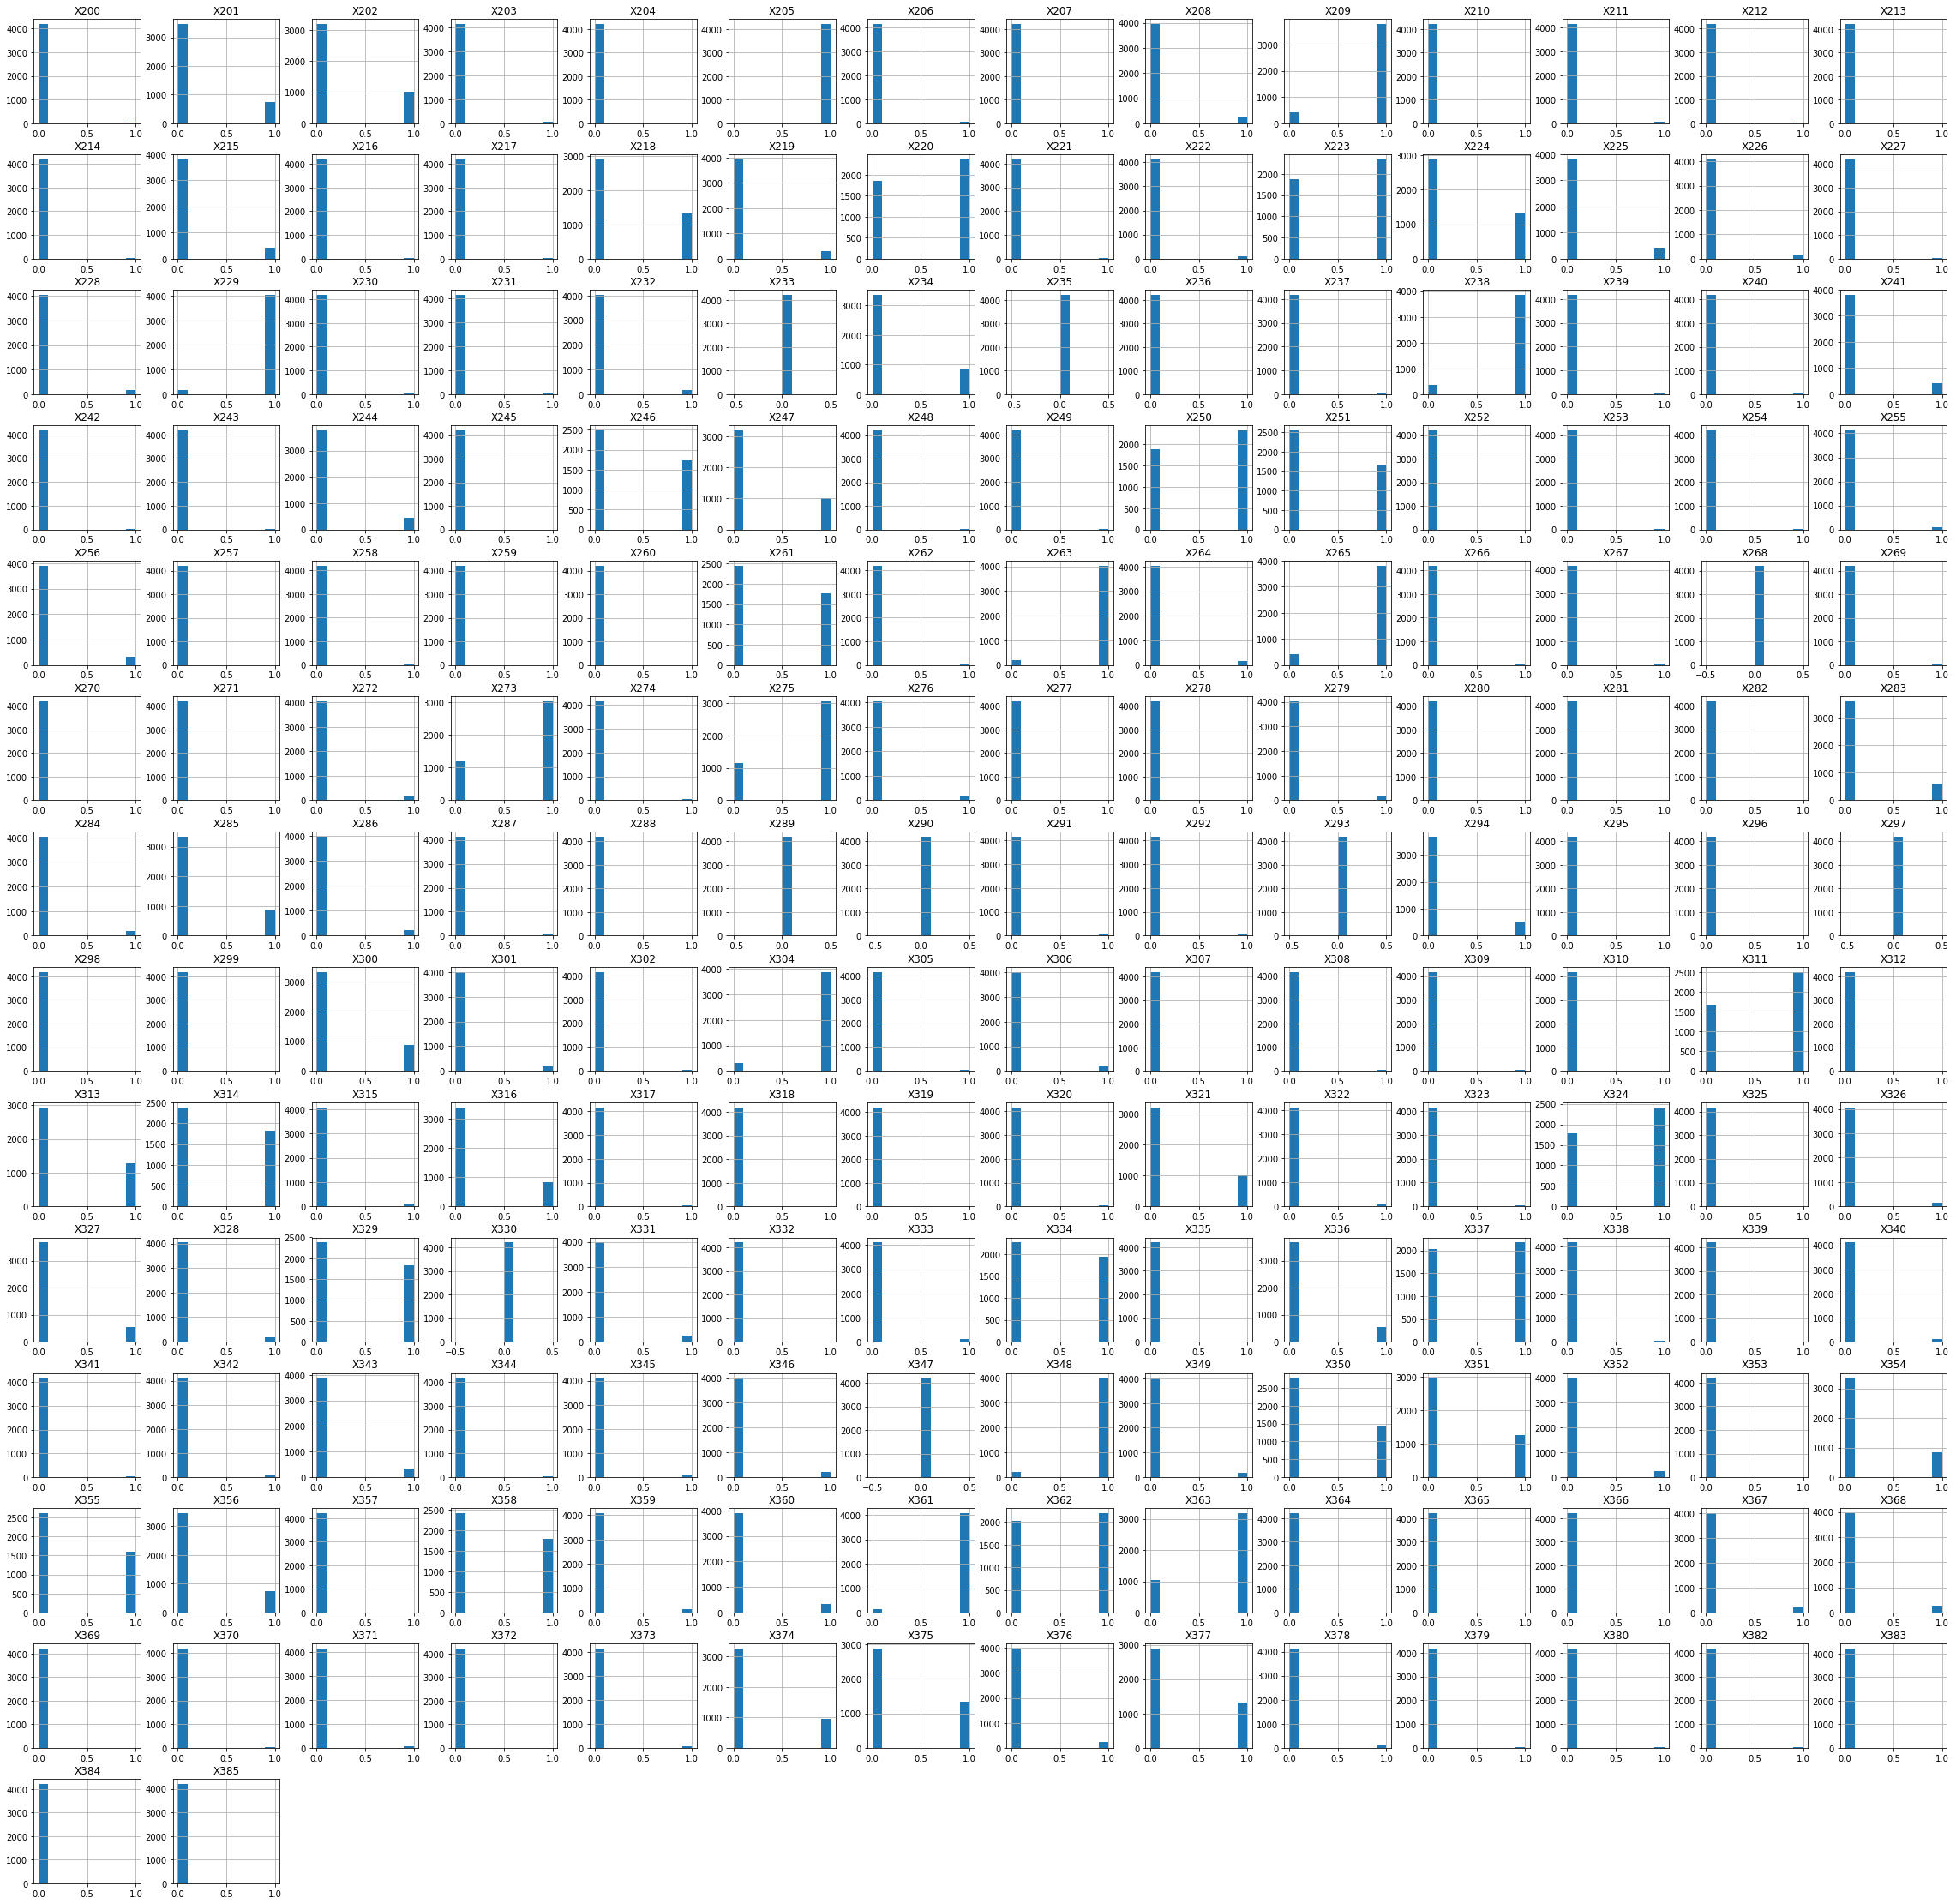

In [76]:
_ = train[cols_2].hist(figsize=(40, 40))# гистограммы для второй половины признаков

Целочисленные признаки все бинарные

Отделим целевую переменную

In [78]:
target = train.iloc[:,1]
target.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

Описательные статистики целевой переменной

In [79]:
target.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

Определим, есть ли выбросы в целевой переменной

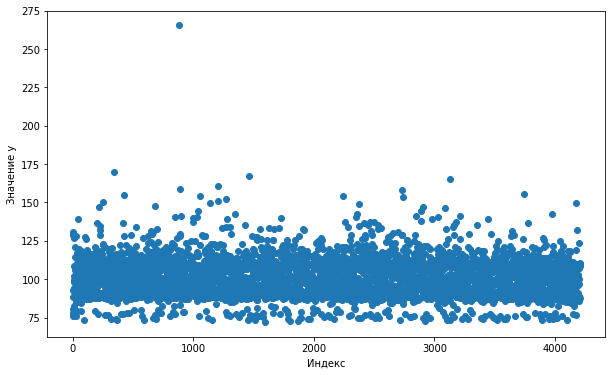

In [80]:
%matplotlib inline
x = range(train.shape[0])
plt.figure(figsize=(10, 6))
plt.xlabel('Индекс')
plt.ylabel('Значение y')
_ = plt.scatter(x, target)

Упорядочим значения целевой переменной

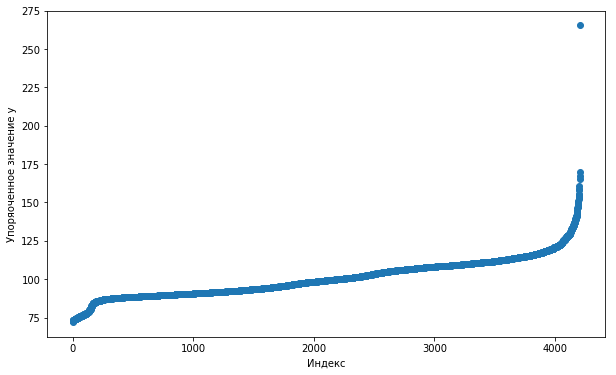

In [81]:
y = target.sort_values(ascending = True)
plt.figure(figsize=(10, 6))
plt.xlabel('Индекс')
plt.ylabel('Упоряоченное значение y')
_ = plt.scatter(x, y)

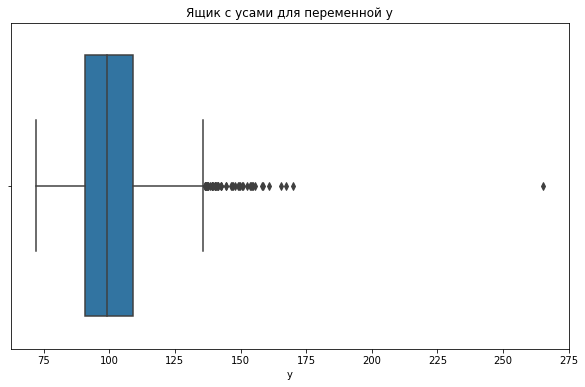

In [82]:
plt.figure(figsize=(10, 6))
plt.title('Ящик с усами для переменной y')
_ = sns.boxplot(x=target)

Посмотрим на распределение целевой переменной

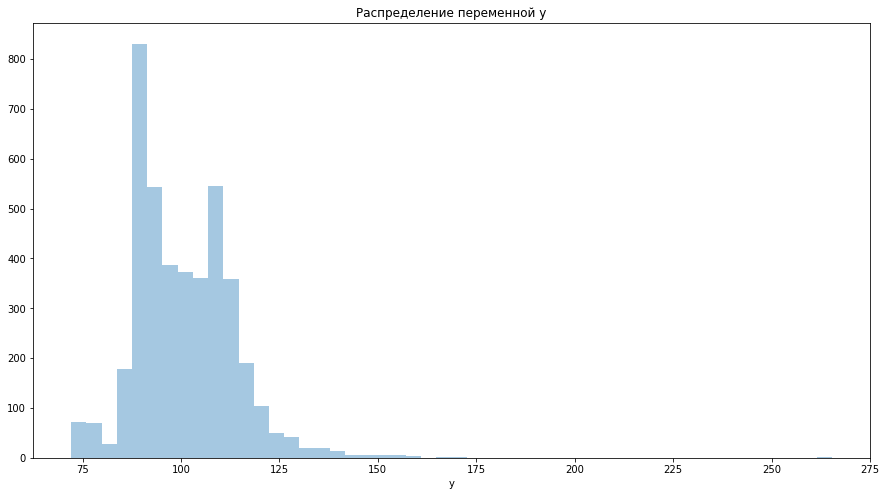

In [83]:
plt.figure(figsize=(15, 8))
plt.title('Распределение переменной y')
_ = sns.distplot(target, bins=50, kde=False)

Уберем отклоняющееся значение

In [84]:
train = train.loc[train['y']!=train['y'].max()]# в фильтре выбираем все значения кроме максимального

In [85]:
target_wo_out = train.iloc[:,1]

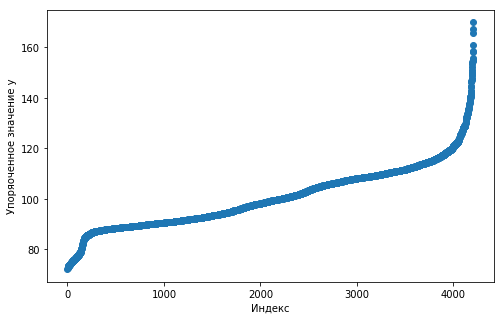

In [86]:
y = target_wo_out.sort_values(ascending = True)
x = range(train.shape[0])
plt.figure(figsize=(8, 5))
plt.xlabel('Индекс')
plt.ylabel('Упоряоченное значение y')
_ = plt.scatter(x, y)

Посмотрим на распределение целевой переменной

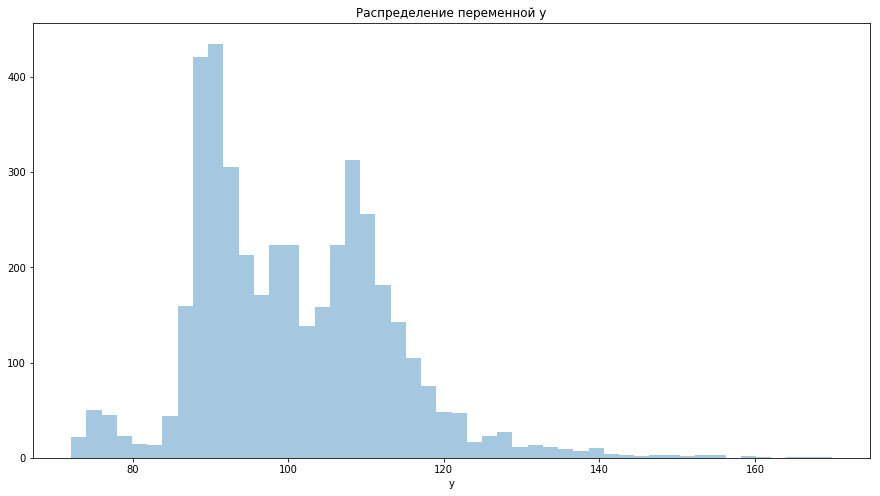

In [87]:
plt.figure(figsize=(15, 8))
plt.title('Распределение переменной y')
_ = sns.distplot(target_wo_out, bins=50, kde=False)

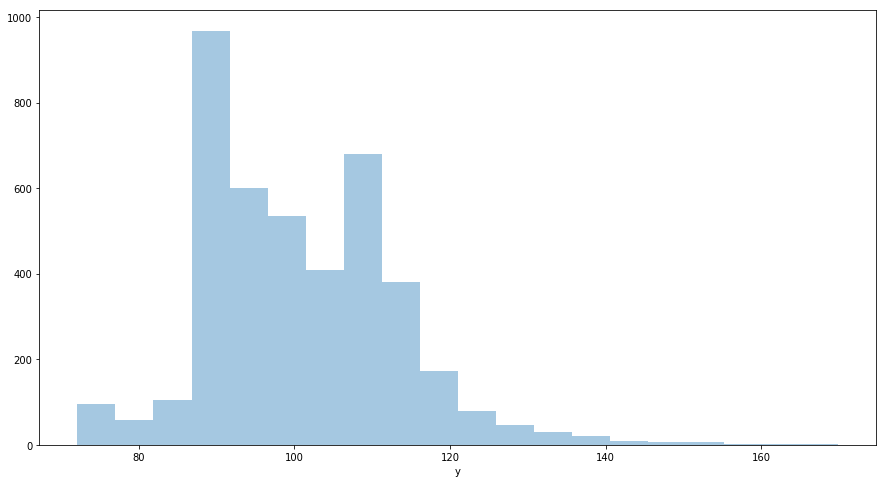

In [88]:
plt.figure(figsize=(15, 8))
_ = sns.distplot(target_wo_out, bins=20, kde=False)

Определим, какие признаки коррелируют с целевой переменной

In [89]:
correlations_data = train.drop(columns = 'ID').corr()['y']

In [7]:
train.corr()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.055108,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,...,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,-0.015355,0.029059
y,-0.055108,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,0.001602,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,-0.031917,0.048276,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.025438,0.193643,-0.100474,NaN,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,0.002237,0.023116,-0.002532,NaN,-0.006212,-0.005409,-0.018865,1.000000,-0.001116,-0.001908,...,-0.014917,-0.005373,0.032168,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,-0.000475,-0.000824
X16,-0.036480,0.048946,-0.005944,NaN,-0.014584,-0.012698,-0.044291,-0.001116,1.000000,-0.004480,...,-0.025036,-0.012615,0.045461,-0.007437,-0.005014,-0.004619,-0.004480,-0.002089,-0.001116,-0.001934
X17,-0.038171,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307


In [90]:
correlations_data.isnull().sum()

12

Для 12 признаков коэффициент корреляции равен 0

In [91]:
zero_keys = []
for i in correlations_data.keys():
    if np.isnan(correlations_data[i]):
        zero_keys.append(i)
zero_keys# признаки, которые никак не коррелируют с целевой переменной

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

Уберем столбцы с целевой переменной, ID и не коррелирующие признаки из данных

In [92]:
drop_keys = zero_keys + ['y', 'ID']
train.drop(columns = drop_keys, inplace = True)

In [93]:
train.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0


Выделим категориальные признаки

In [94]:
cat_col = train.select_dtypes(include=['object']).columns
cat_col

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [95]:
train[cat_col].head(5)

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


Применим one-hot кодирование

In [96]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(train[cat_col])
ohe_train = ohe.transform(train[cat_col]).toarray()
train.drop(columns = cat_col, inplace = True)

In [97]:
print(train.shape, ohe_train.shape)

(4208, 356) (4208, 195)


In [98]:
npc = np.concatenate((train, ohe_train), axis = 1)#соединим массив без категориальных признаков с закодированным массивом
train_wo_cat = pd.DataFrame(npc)

In [99]:
train_wo_cat.shape

(4208, 551)

In [100]:
target_wo_out.shape

(4208,)

In [101]:
train_wo_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Аналогичная процедура для теста

In [105]:
test.drop(columns = zero_keys, inplace = True)

In [106]:
print(test[cat_col].shape, test.shape)

(4209, 8) (4209, 364)


In [107]:
ohe_test = ohe.transform(test[cat_col]).toarray()
test.drop(columns = cat_col, inplace = True)

In [108]:
npc = np.concatenate((test, ohe_test), axis = 1)#соединим массив без категориальных признаков с закодированным массивом
test_wo_cat = pd.DataFrame(npc)

In [109]:
print(target_wo_out.shape, train_wo_cat.shape)

(4208,) (4208, 551)


In [110]:
print(target_wo_out.shape, test_wo_cat.shape)

(4208,) (4209, 551)


Выше мы определили, что числовые признаки бинарные. Таким образом, не нужно проводить нормировку признаков

## Построение моделей

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### Линейная регрессия

In [41]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(train_wo_cat, target_wo_out, test_size = 0.3, random_state = 42)

In [42]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2945, 551) (2945,) (1263, 551) (1263,)


In [43]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [44]:
r2 = r2_score(y_test, predictions)
r2

-1.3042763179210407e+23

In [45]:
cross_val_score(estimator=model, X=train_wo_cat, y=target_wo_out, cv=7, scoring='r2')

array([-1.15715861e+23, -3.56436033e+23, -7.80357231e+23, -6.76141506e+21,
       -1.69041190e+23, -1.22363128e+23, -2.72058198e+23])

### Ridge регуляризация

In [112]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [113]:
model = Ridge()

In [57]:
cvs = cross_val_score(estimator=model, X=train_wo_cat, y=target_wo_out, cv=7, scoring='r2')

In [58]:
cvs

array([0.56965591, 0.51254011, 0.50271397, 0.61695657, 0.47761581,
       0.60362756, 0.59332144])

In [59]:
np.mean(cvs)

0.5537759107999654

In [23]:
print(np.mean(cvs) - 3*np.std(cvs), np.mean(cvs) + 3*np.std(cvs))

0.2993185603355961 0.7663442125691036


Предсказание на тесте

In [115]:
model.fit(train_wo_cat, target_wo_out)
predictions = model.predict(test_wo_cat)

Посик параметров по сетке

In [51]:
params = {'alpha':(1, 2, 5, 10, 100, 1000)}

In [52]:
grid = GridSearchCV(model, params, refit = True)

In [53]:
grid.fit(X_train, y_train)
predictions = grid.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [54]:
print(grid.best_params_)

{'alpha': 100}


In [55]:
r2 = r2_score(y_test, predictions)
r2

0.522494008039512

### Lasso регуляризация

In [89]:
from sklearn.linear_model import Lasso

In [123]:
model = Lasso()

In [125]:
cvs = cross_val_score(estimator=model, X=train_wo_cat, y=target_wo_out, cv=7, scoring='r2')

In [126]:
cvs

array([0.41597618, 0.40170614, 0.36318462, 0.43180338, 0.34676415,
       0.39733692, 0.45301264])

In [127]:
np.mean(cvs)

0.4013977190814006

In [128]:
print(np.mean(cvs) - 3*np.std(cvs), np.mean(cvs) + 3*np.std(cvs))

0.2983269361463833 0.5044685020164179


### XGBoost

In [ ]:
from xgboost import XGBRegressor

In [129]:
model = XGBRegressor()

In [130]:
cvs = cross_val_score(estimator=model, X=train_wo_cat, y=target_wo_out, cv=7, scoring='r2')

In [131]:
cvs

array([0.59000653, 0.50185447, 0.49671609, 0.57788599, 0.44827008,
       0.58127111, 0.61020866])

In [132]:
np.mean(cvs)

0.5437447055249357

In [133]:
print(np.mean(cvs) - 3*np.std(cvs), np.mean(cvs) + 3*np.std(cvs))

0.3747475689473934 0.712741842102478


### Submission

In [116]:
submission = pd.DataFrame({'ID':test_id,'y':predictions})

In [117]:
submission.head()

,ID,y
0,1,93.761290
1,2,109.677868
2,3,97.002284
3,4,79.342868
4,5,108.966723


In [119]:
filename = 'merc_sub.csv'

In [120]:
submission.to_csv(filename,index=False)

In [ ]:
print('Saved file: ' + filename)